# Hierarchical Clustering

In [1]:
#Dr. Benjamin Soibam
#Jeffrey Tijerina

import os 
import sys
import csv

import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import AgglomerativeClustering #same as hierarchical clustering
import sklearn.metrics as sm

from heatmapcluster import heatmapcluster


C:\Users\PKchu\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
np.set_printoptions(precision = 5, suppress = True) #digits of precision for float values
plt.figure(figsize = (10,4))
%matplotlib inline
#plt.style.use('seaborn-whitegrid')

# Setting Up Test Data - Proof of Concept

In [13]:
def test_data(size, seed=None):
    if seed is not None:
        np.random.seed(seed)

    s = np.random.gamma([2, 3, 3], [6, 8, 5], size=(size[1], 3)).T #.T - transpose matrix
    i = np.random.choice(range(len(s)), size=size[0])
    x = s[i]

    t = np.random.gamma([8, 5, 6], [3, 3, 2.1], size=(size[0], 3)).T
    j = np.random.choice(range(len(t)), size=size[1])

    x += 1.1*t[j].T

    x += 2*np.random.randn(*size)

    row_labels = [('R%02d' % k) for k in range(x.shape[0])] #.shape array (#rows,#cols)
    col_labels = [('C%02d' % k) for k in range(x.shape[1])]


    return x, row_labels, col_labels


In [16]:
#test_data(size=(3, 5), seed=123)

x, row_labels, col_labels = test_data(size=(64, 48), seed=123) #heatmap/dendogram w/test data

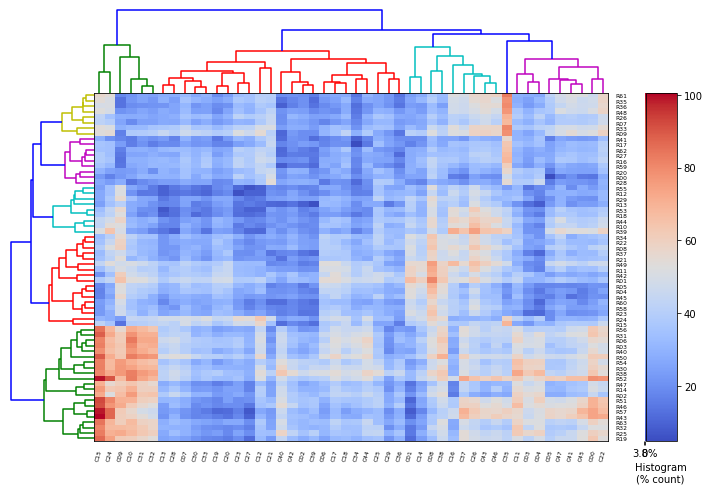

In [17]:
h = heatmapcluster(x, row_labels, col_labels,
                   num_row_clusters=5, num_col_clusters=5,
                   label_fontsize=6,
                   xlabel_rotation=75,
                   cmap=plt.cm.coolwarm,
                   show_colorbar=True,
                   top_dendrogram=True,
                   row_linkage=lambda x: linkage(x, method='complete', metric='euclidean'),
                   col_linkage=lambda x: linkage(x.T, method='complete', metric='euclidean'),
                   #linkages: single, complete, average, weighted, centroid, median, ward
                   #metric: correlation, euclidean, cosine, cityblock
                   histogram=True)
plt.show()

# Importing Sample Data

In [25]:
def import_data():
    sample_data = 'C:/Users/PKchu/Desktop/UHD/SPRING 2021/Senior Project/Soibam/gm12878_sample.csv'
    histone = pd.read_csv(sample_data)
    
    histone_columns = ['CTCF', 'DNase', 'H2A', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K79me2', 'H3K9ac', 'H3K9me3', 'H4K20me1', 'Boundary']
    histone_rows = histone.Boundary
    #saved_cols = histone.column_name #histone['column_name']
    #filtered_cols = pd.read_csv(sample, usecols=['CTCF', 'DNase', 'H2A',..., 'nnn'])

    #x = full array/matrix with all row/col values
    #x = np.zeros((histone.shape[0], histone.shape[1])) #setting up initial '0' matrix (n rows), (m cols)    
    x = []
    x = histone.values
    #cleaning up data - getting rid of boundary "values"
    x = np.delete(x, (histone.shape[1] - 1), 1) #(array, index, axis - 0: row, 1: col)
    
    #x = np.float32(x) #has to be converted 1 value at a time.....
    #x = x.item()
    
    return x, histone_rows, histone_columns

In [26]:
import_data()

x, row_labels, col_labels = import_data()

TypeError: Image data of dtype object cannot be converted to float

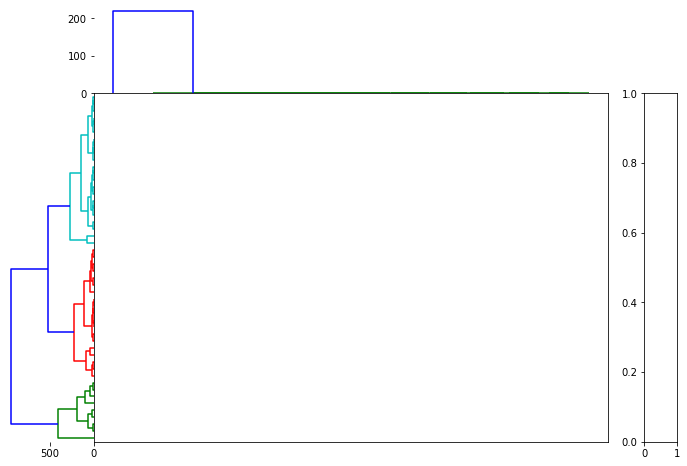

In [27]:
h = heatmapcluster(x, row_labels, col_labels,
                   num_row_clusters=3, num_col_clusters=2,
                   label_fontsize=6,
                   xlabel_rotation=-75,
                   cmap=plt.cm.coolwarm,
                   show_colorbar=True,
                   top_dendrogram=True,
                   row_linkage=lambda x: linkage(x, method='complete', metric='euclidean'),
                   col_linkage=lambda x: linkage(x.T, method='complete', metric='euclidean'),
                   #linkages: single, complete, average, weighted, centroid, median, ward
                   #metric: correlation, euclidean, cosine, cityblock
                   histogram=True)
plt.show()